In [2]:
# Import dependancies
import imageio
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from os import path
from selenium import webdriver
from PIL import Image
from pathlib import Path
print(os.getcwd())

/Users/rogerwatts/Desktop/Classwork/FAO-Fertilizer-Data-Analysis


In [4]:
# Import agriculture land use data
# ag_land_df = pd.read_csv("Inputs_LandUse_E_All_Data.csv")
# filter_list =  ['Agriculture']
# ag_land_df = land_df[land_df['Item'].isin(filter_list)]
# ag_land_df

In [ ]:
# # Create df containing country area data
# land_df = pd.read_csv("Inputs_LandUse_E_All_Data.csv")
# filter_list =  ['Country area']
# land_df = land_df[land_df['Item'].isin(filter_list)]
# land_df

In [ ]:
# Merge dataframes to produce columns containing country data for each year
total_land_df = pd.merge(left=ag_land_df, right=land_df, on=['Area', 'Year'])
total_land_df

In [ ]:
# Clean dataframe to contain only relevant columns
total_land_df.rename(columns = {'Value_x':'Agri_Land', 'Value_y':'Total_Land'}, inplace = True)
total_land_df.drop(total_land_df.columns.difference(['Area', 'Year', 'Unit_x', 'Agri_Land','Total_Land']), 1, inplace=True)
total_land_df

In [ ]:
# Create column containing calculated % of agricultural land use for each country
total_land_df['Percent_Ag_Land'] = total_land_df['Agri_Land'] / total_land_df['Total_Land']
total_land_df
              

In [ ]:
total_land_df['Percent_Ag_Land'].mean()


In [ ]:
# set the filepath and load in a shapefile
fp = os.path.join("World_Countries", "World_Countries.shp")
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

In [ ]:
map_df.plot()

In [ ]:
map_df["COUNTRY"].unique().sort()

In [61]:
total_land_df['Area'].isin(map_df['COUNTRY']).value_counts()

True     10786
False     3844
Name: Area, dtype: int64

In [62]:
map_df['COUNTRY'].isin(total_land_df['Area']).value_counts()

True     200
False     49
Name: COUNTRY, dtype: int64

In [64]:
total_land_df['Area'] = total_land_df['Area'].str.replace('United States of America', 'United States')
total_land_df['Area'] = total_land_df['Area'].str.replace('USSR', 'Russian Federation')

In [65]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index("COUNTRY").join(total_land_df.set_index("Area"))
merged.head()

,FID,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,Year,Unit_x,Agri_Land,Total_Land,Percent_Ag_Land
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",1961.0,1000 ha,37700.0,65286.0,0.577459
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",1962.0,1000 ha,37760.0,65286.0,0.578378
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",1963.0,1000 ha,37810.0,65286.0,0.579144
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",1964.0,1000 ha,37873.0,65286.0,0.580109
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",1965.0,1000 ha,37875.0,65286.0,0.580140


In [47]:
# Get a list of years for data loops
from datetime import date

start = date(1961, 1, 1) 
end = date(2019, 1, 1)

year_range = [year for year in range(start.year, end.year +1)]
print(year_range)


[1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [48]:
# set the min and max range for the choropleth map
vmin, vmax = 0, .75

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/geopandas/plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


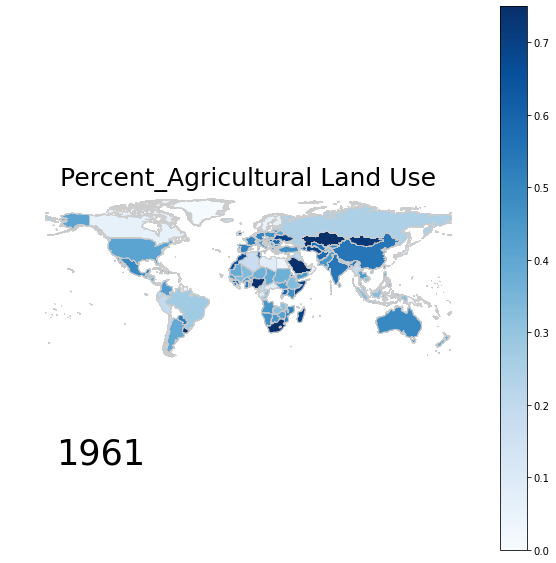

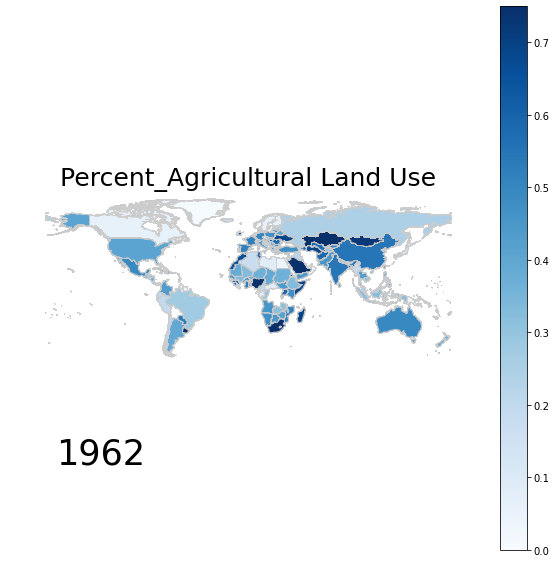

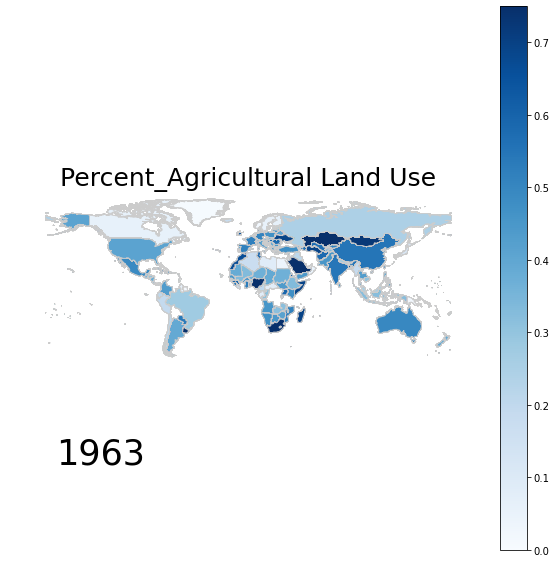

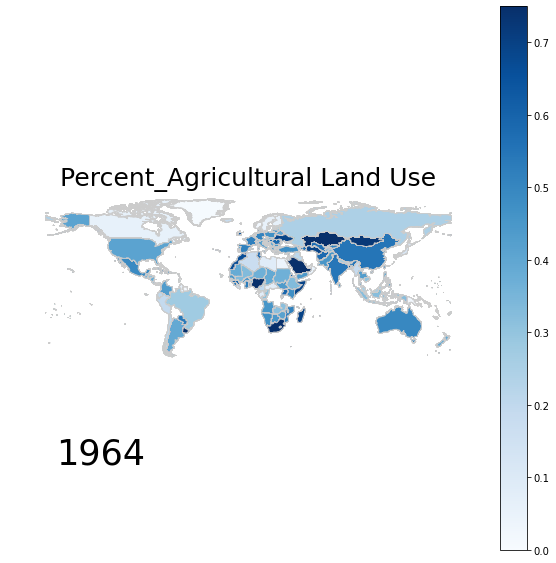

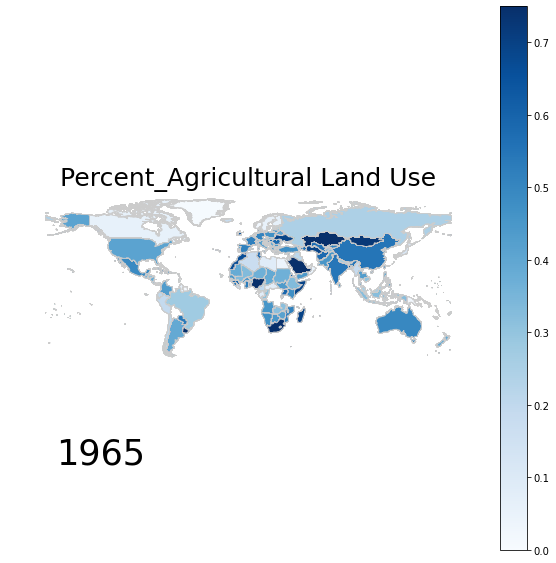

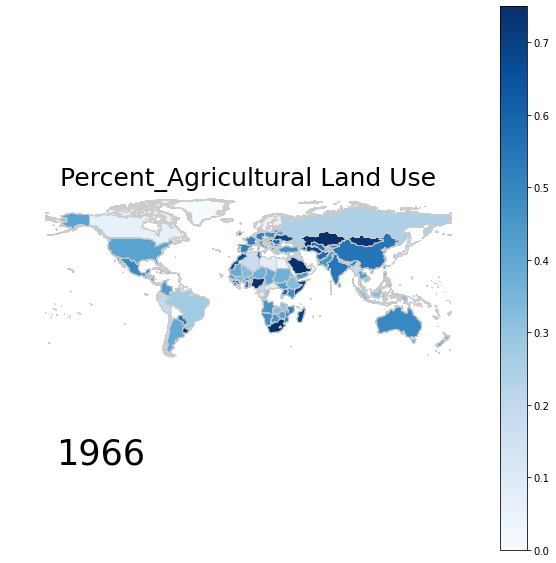

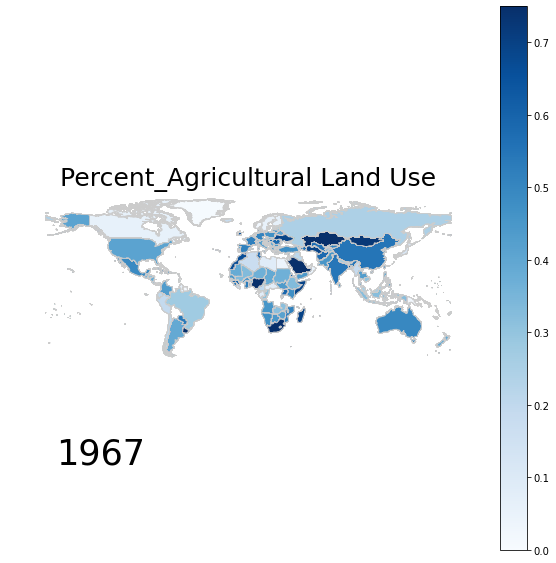

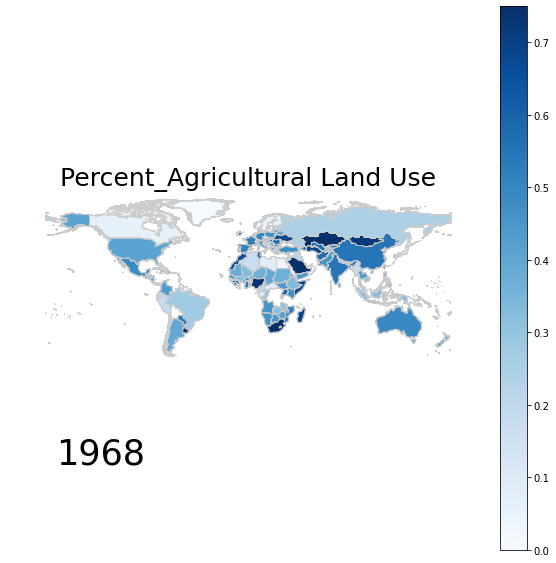

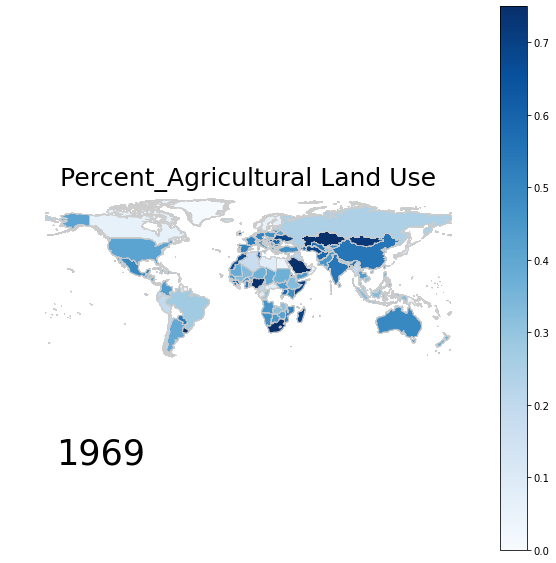

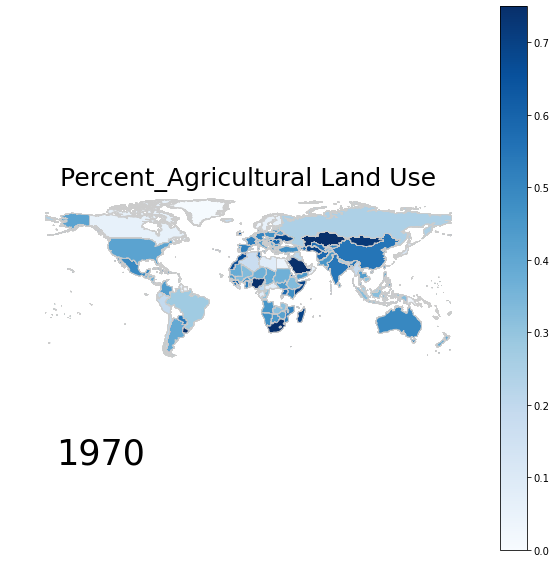

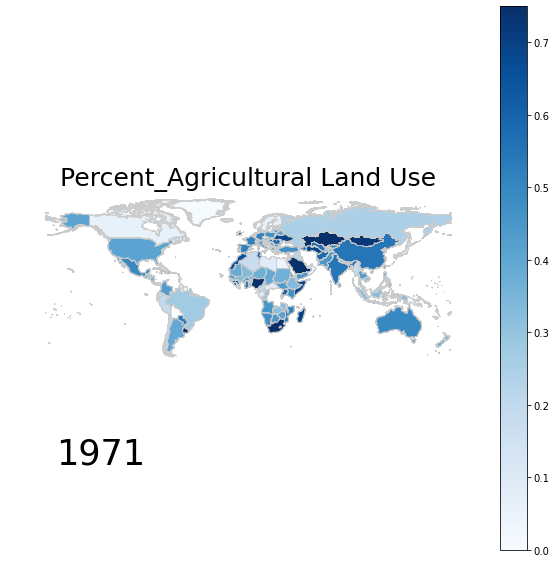

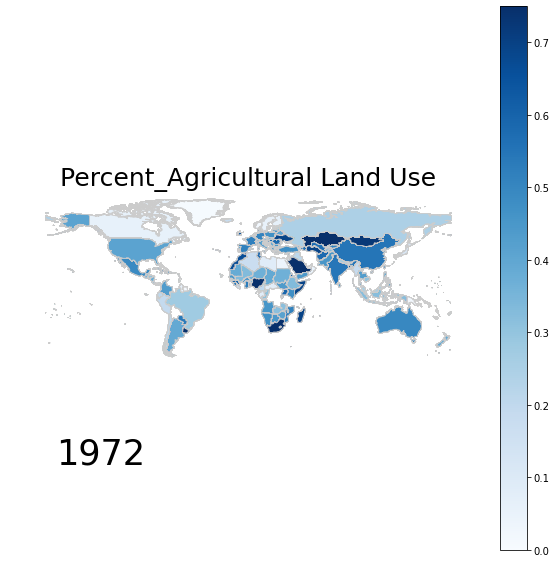

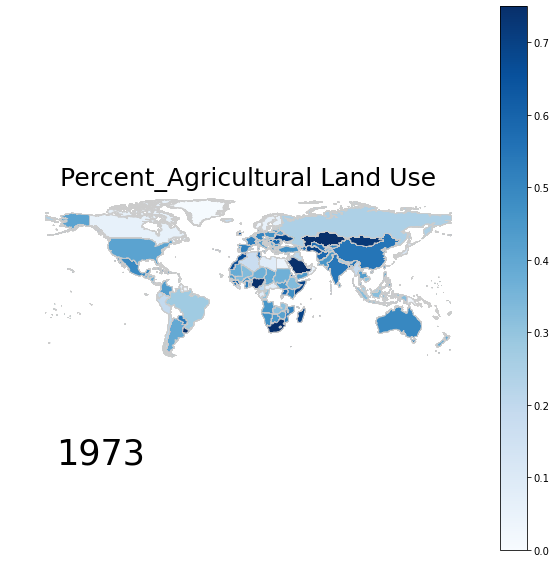

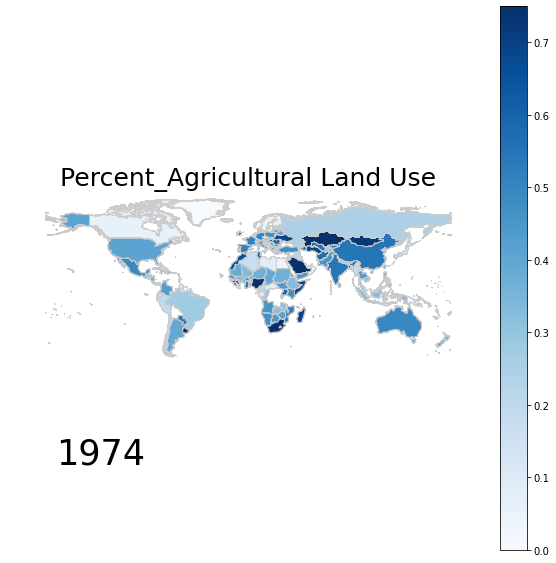

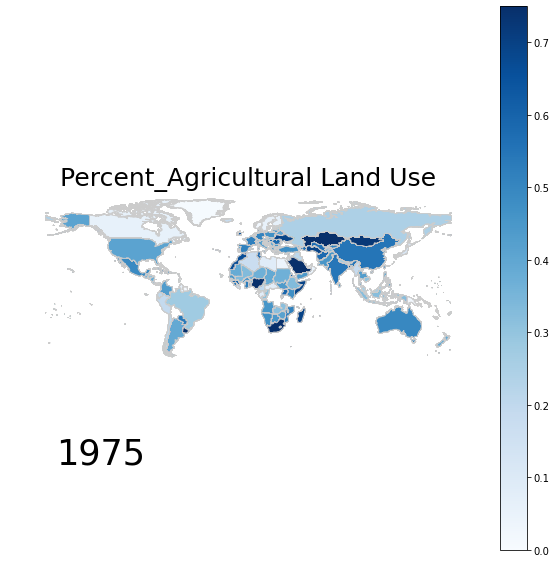

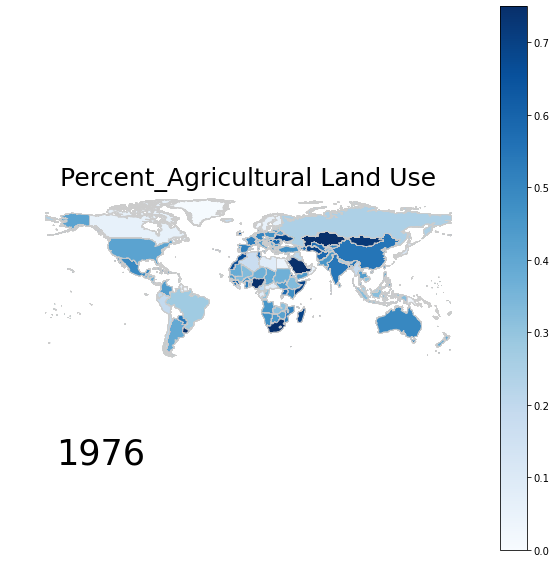

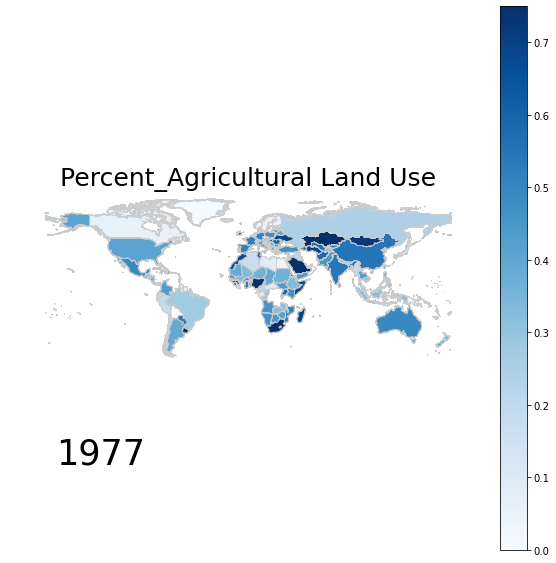

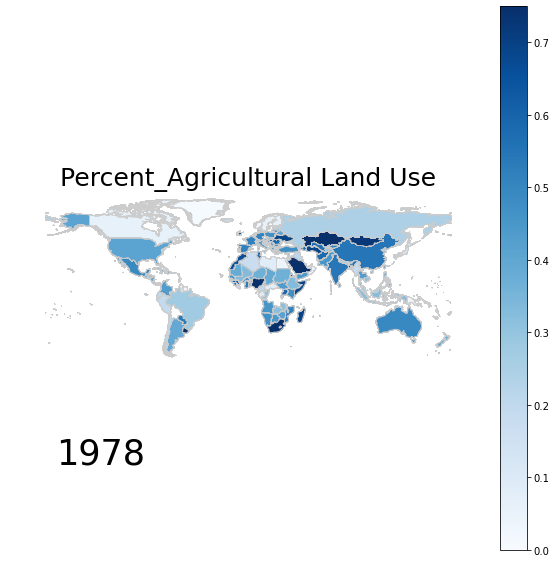

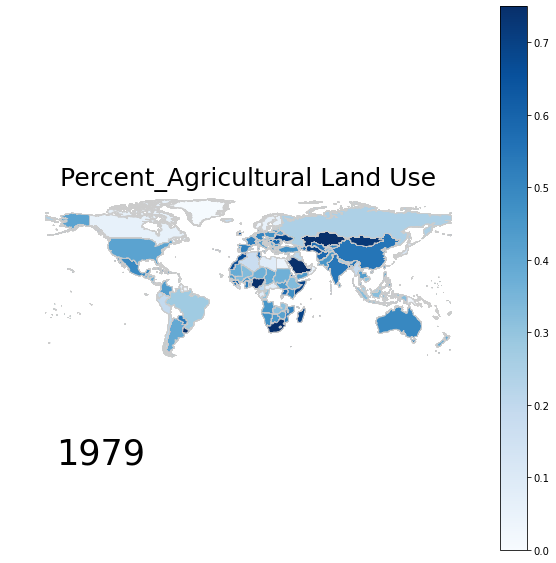

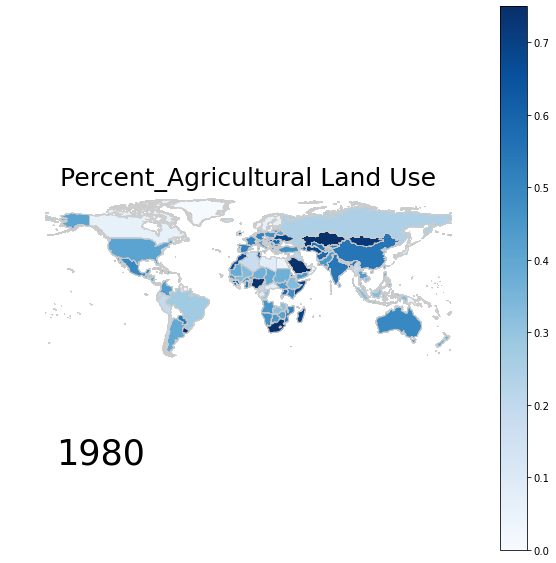

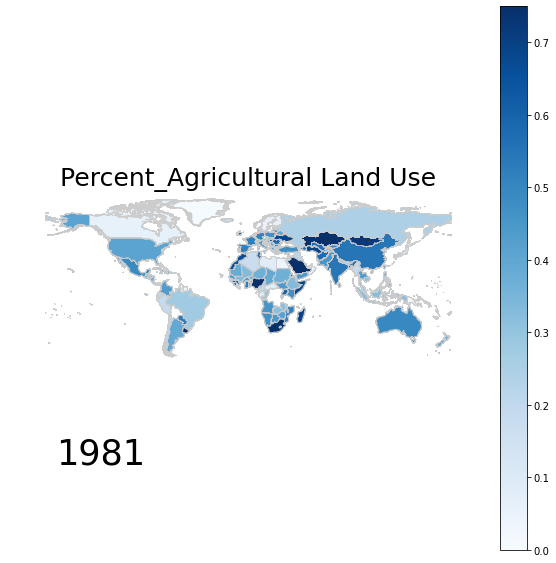

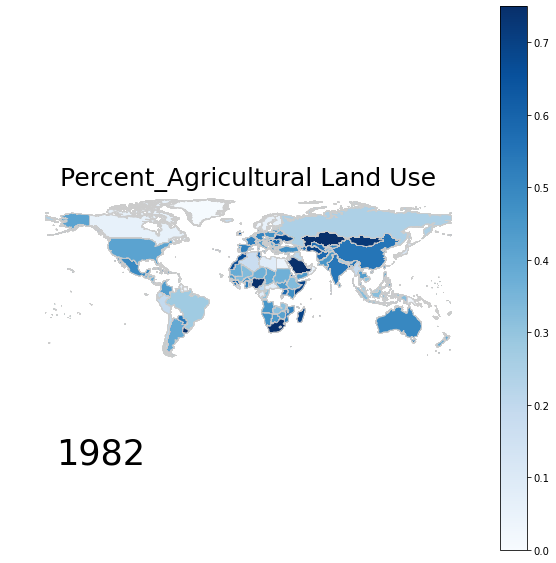

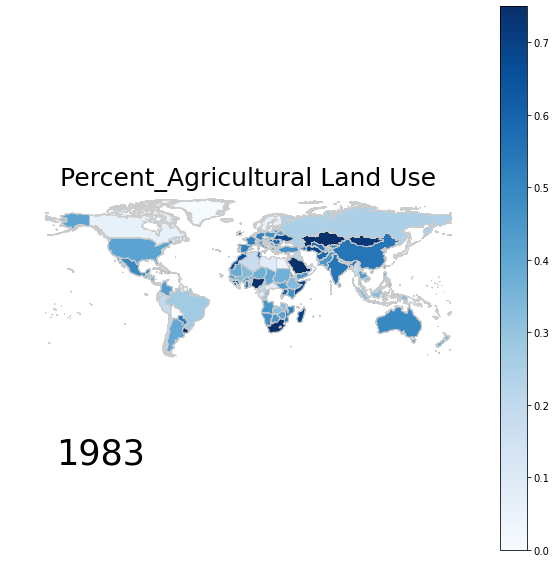

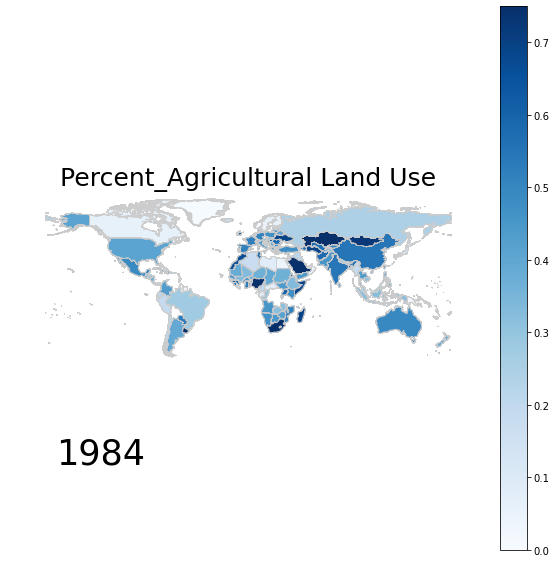

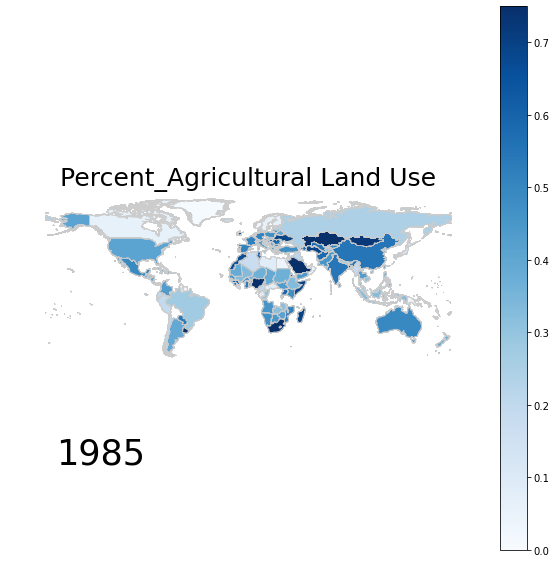

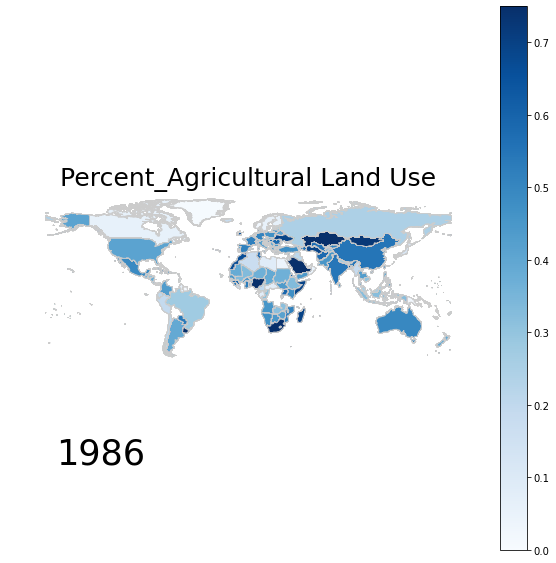

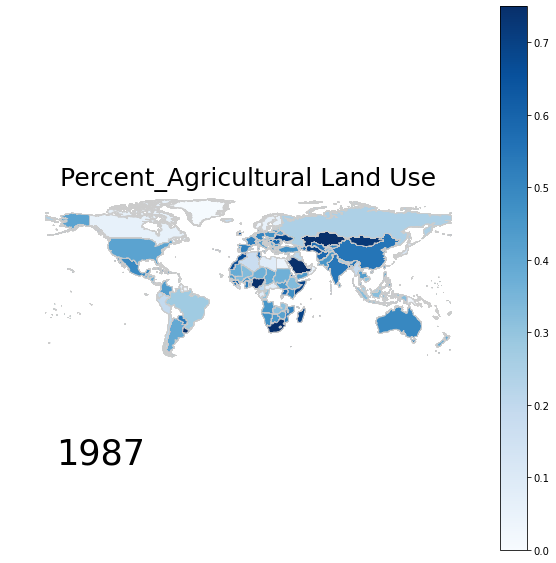

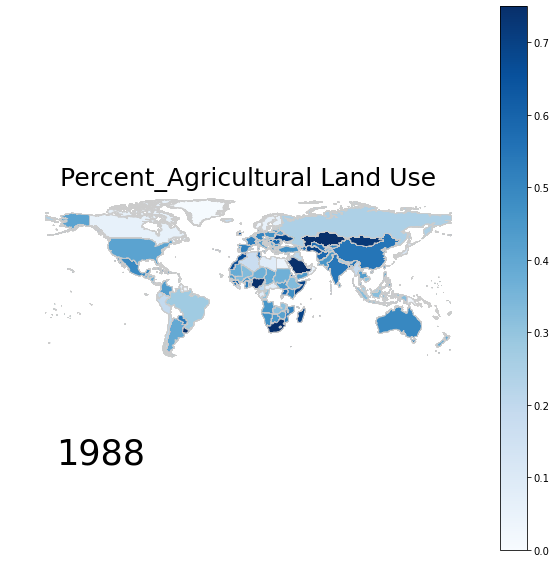

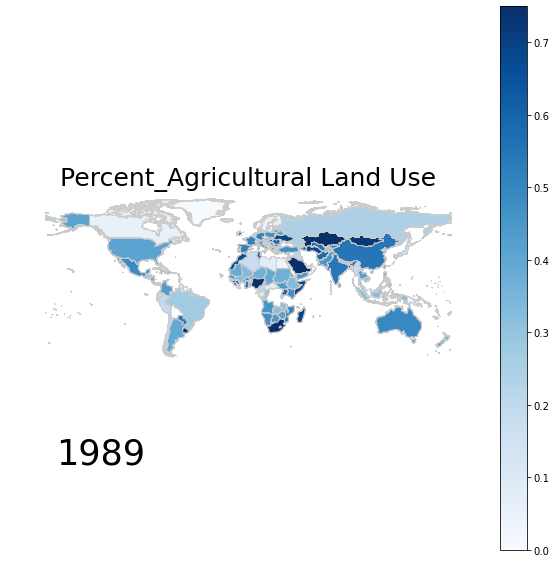

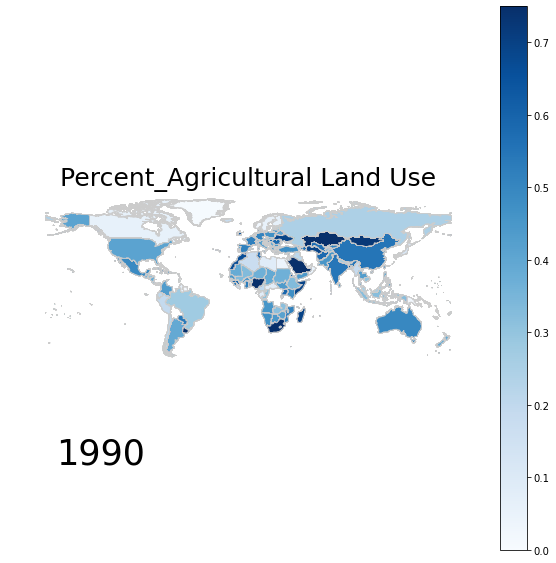

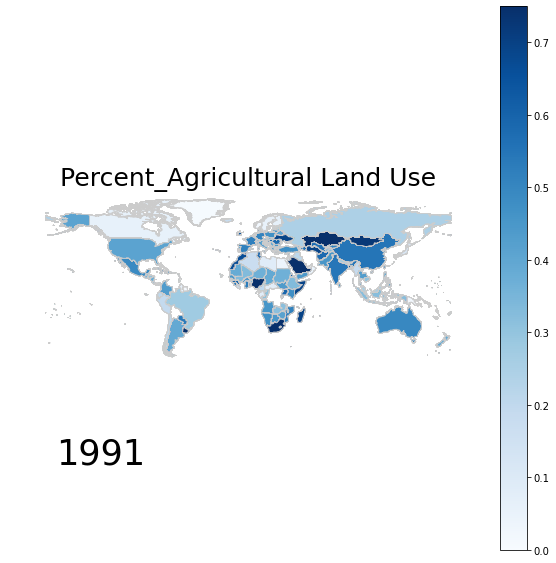

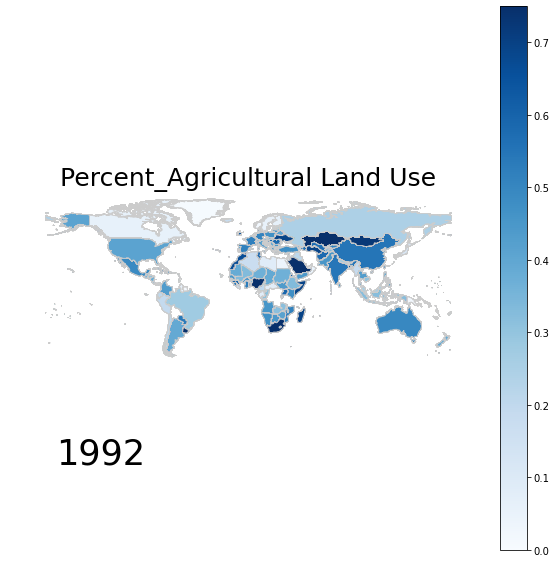

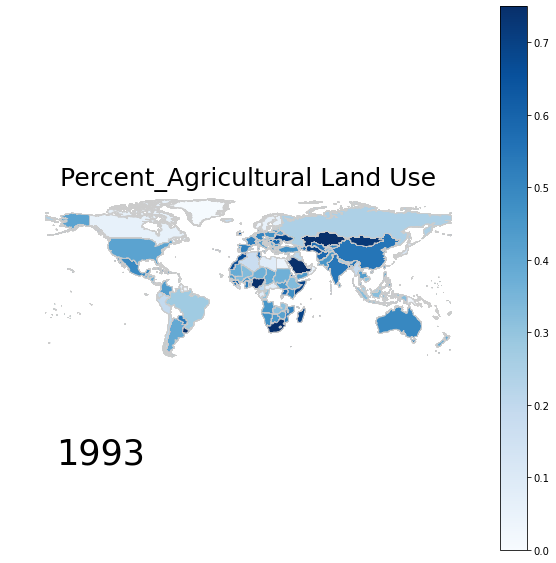

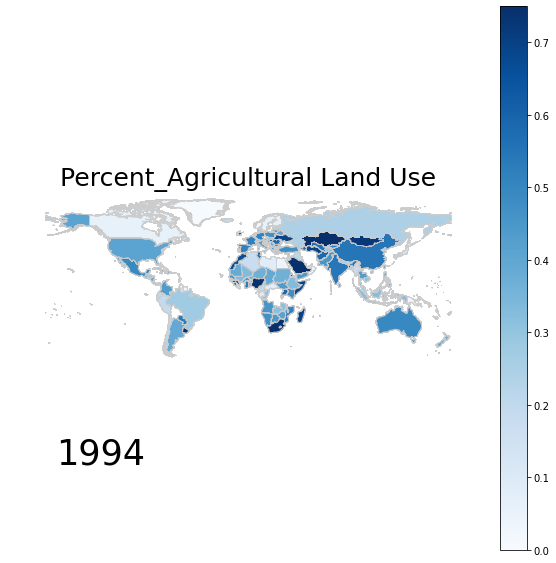

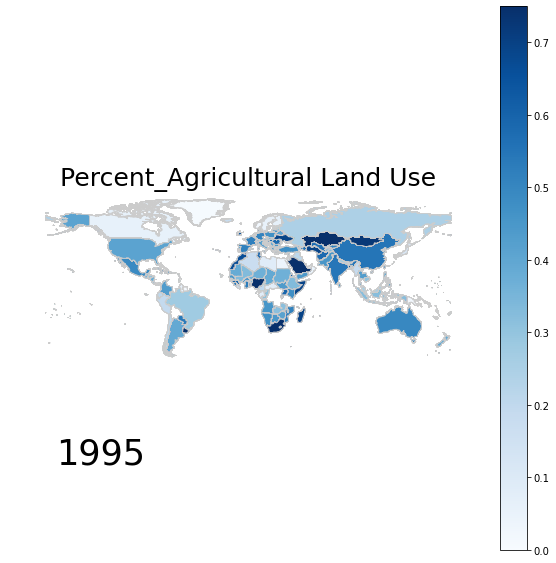

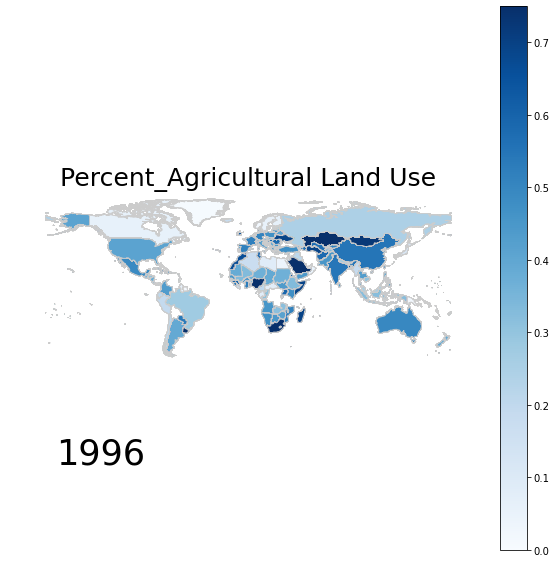

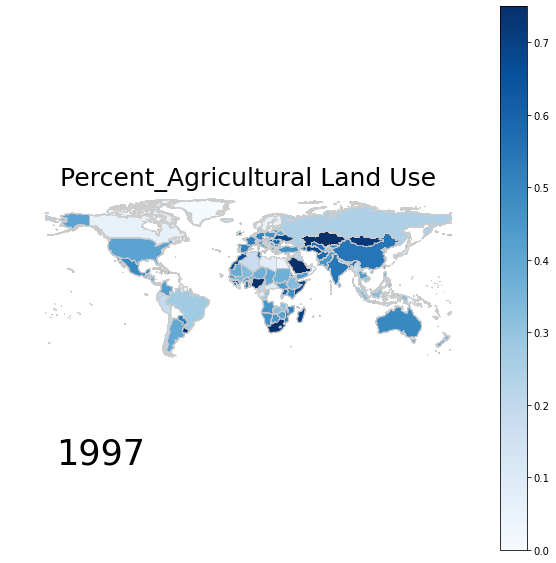

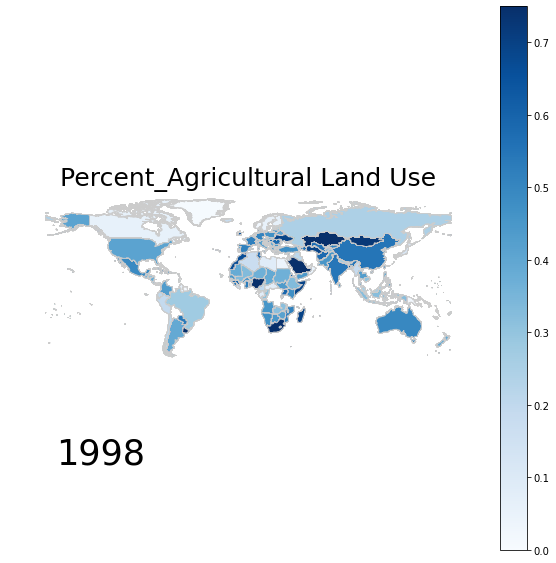

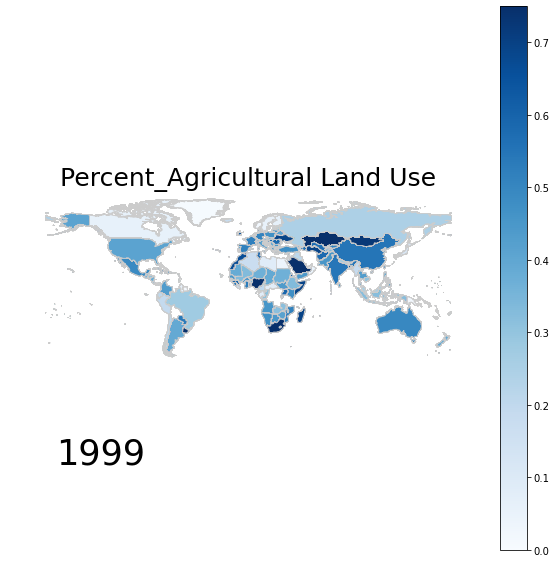

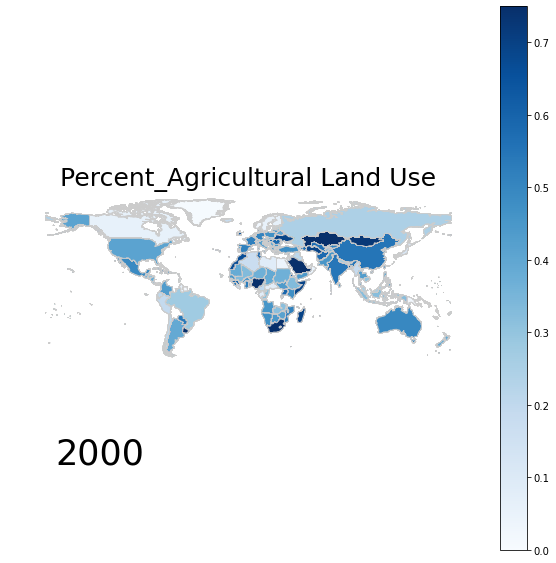

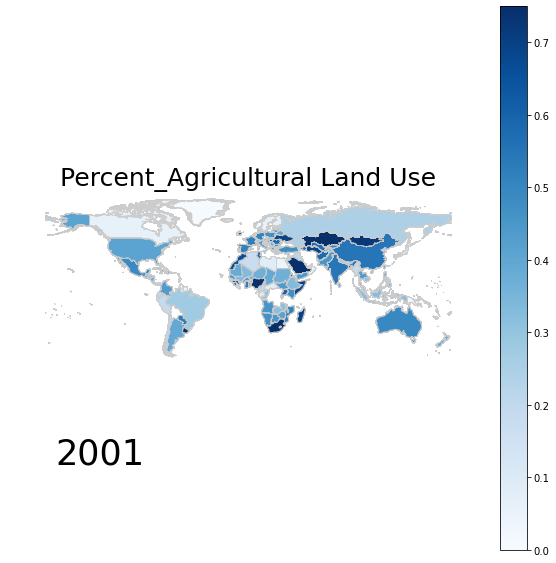

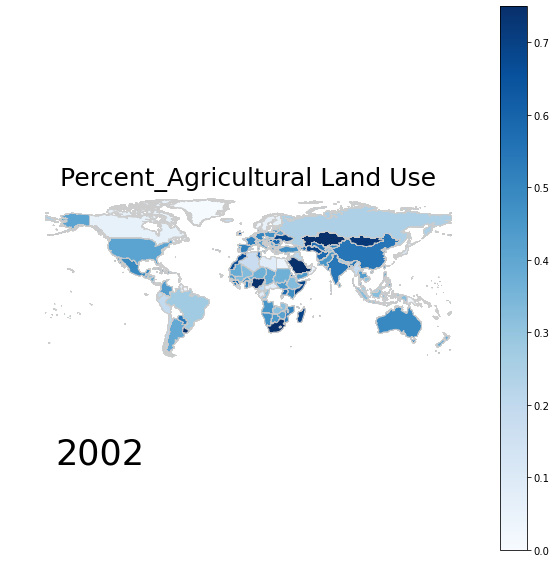

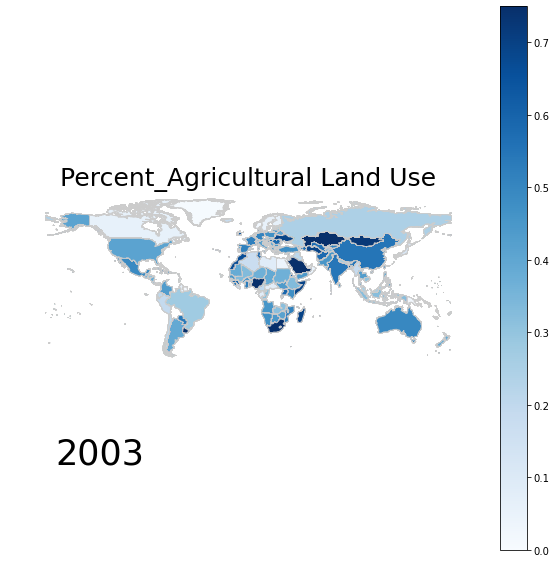

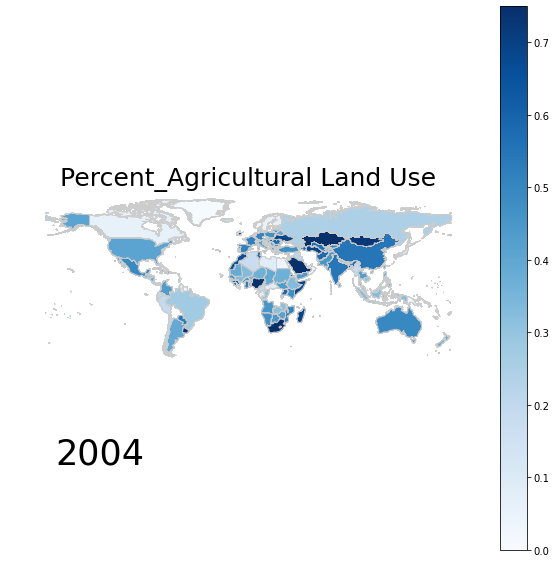

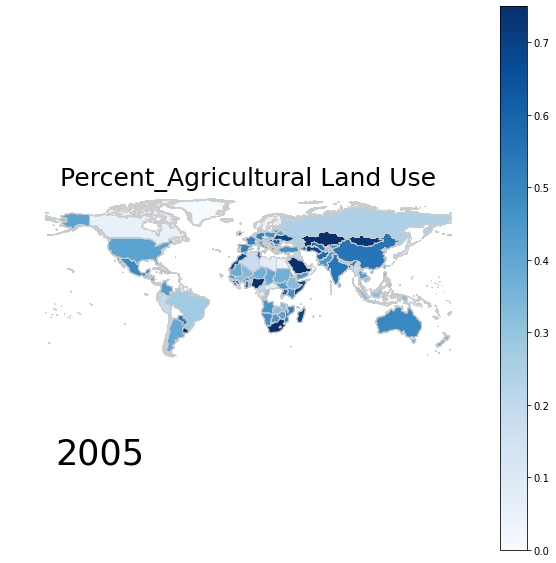

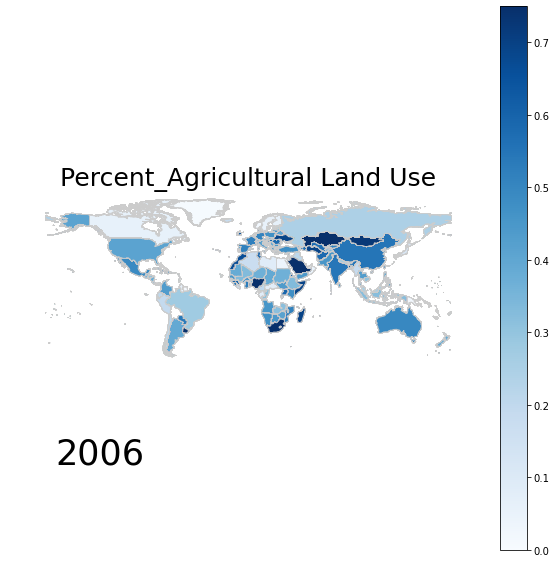

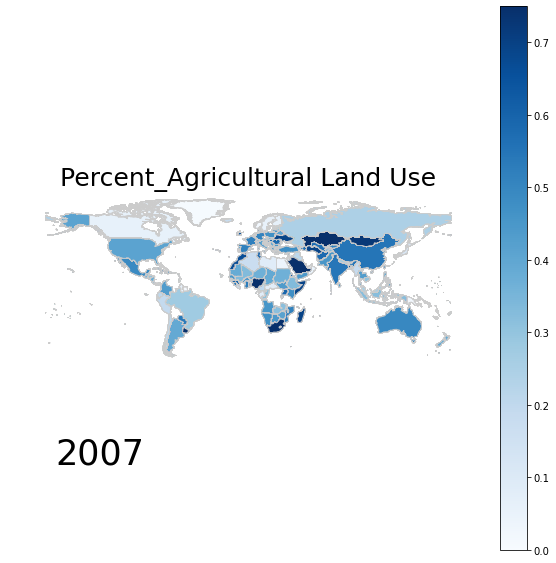

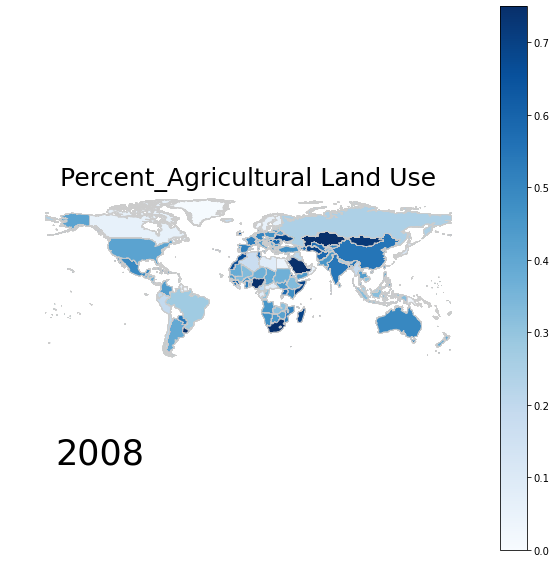

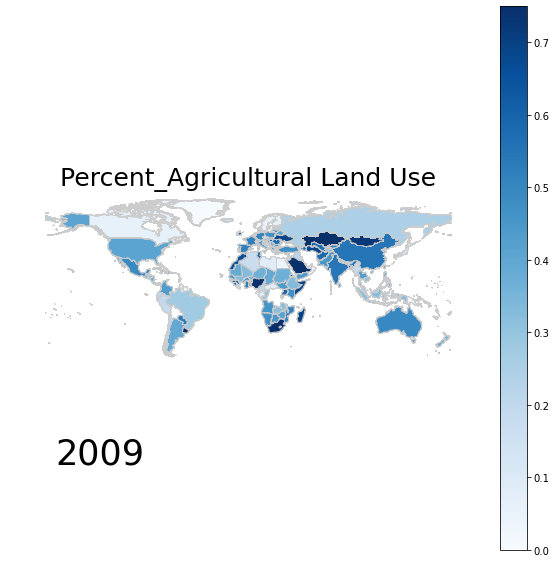

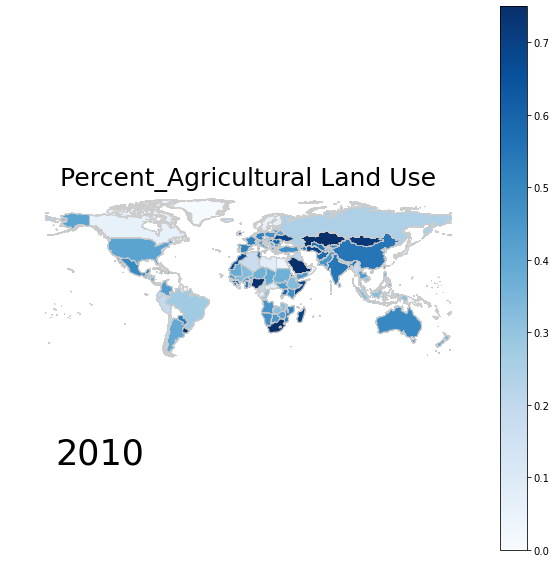

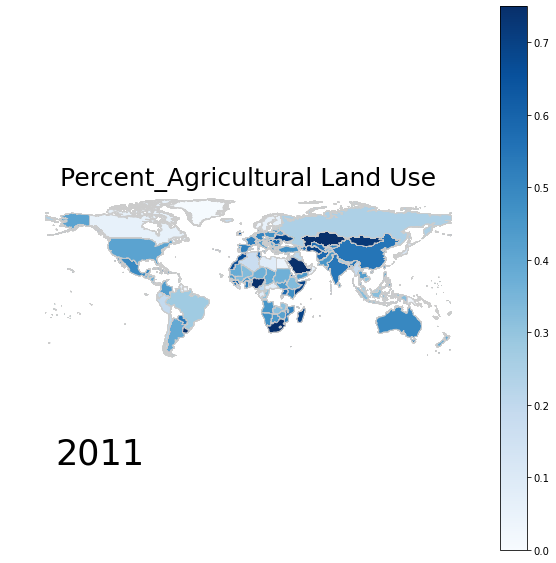

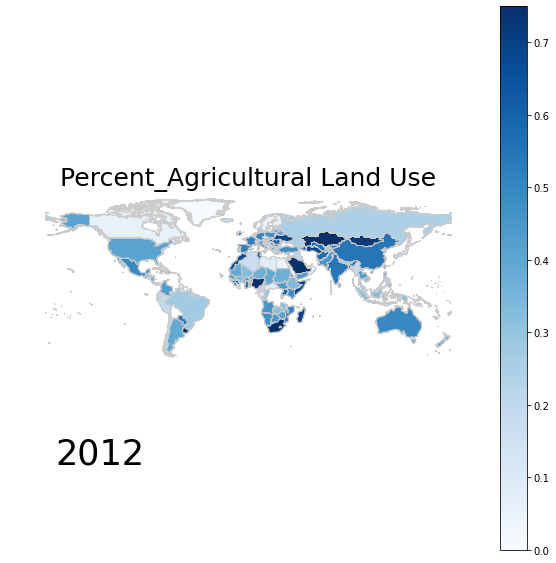

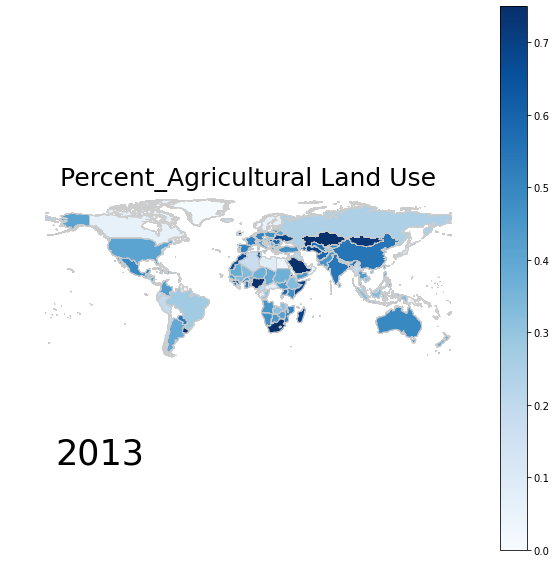

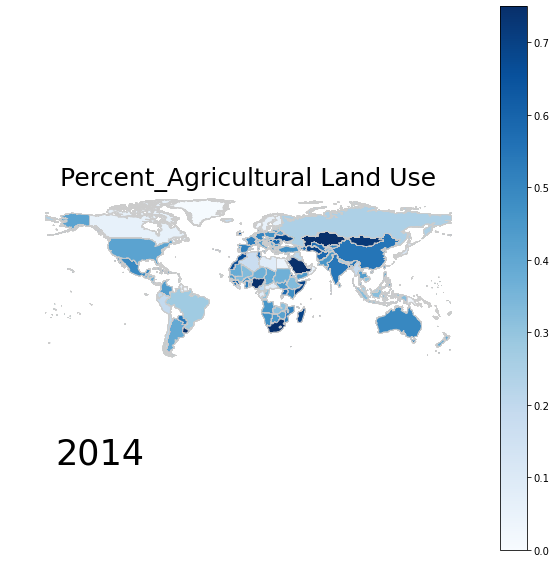

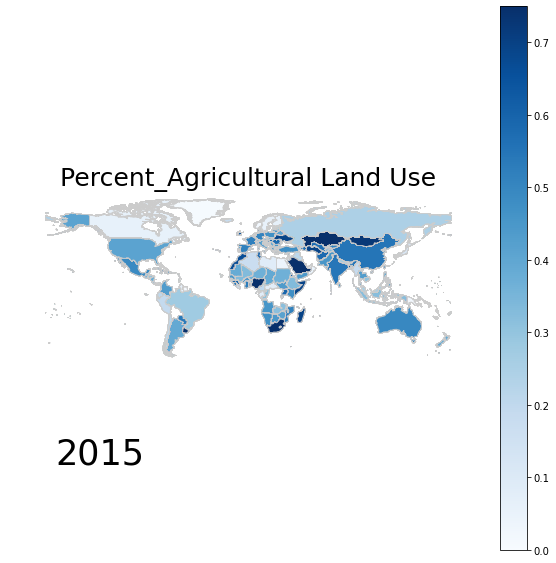

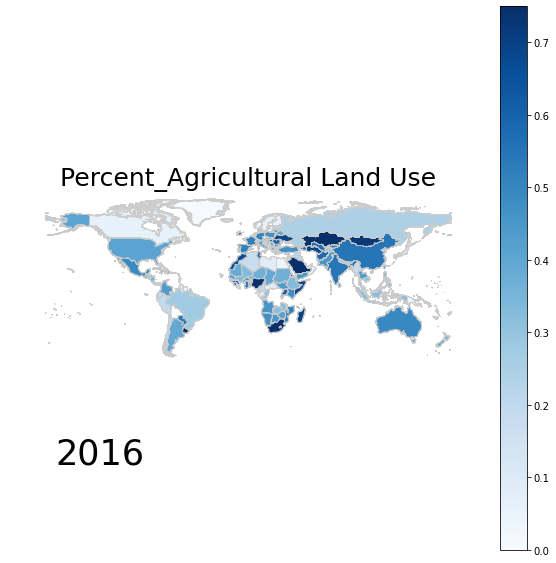

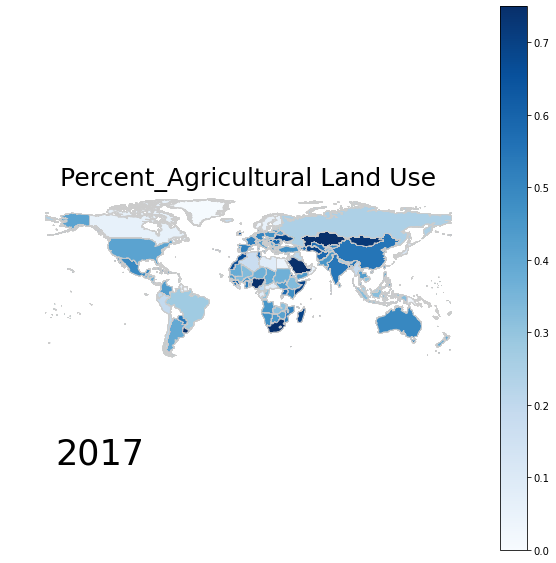

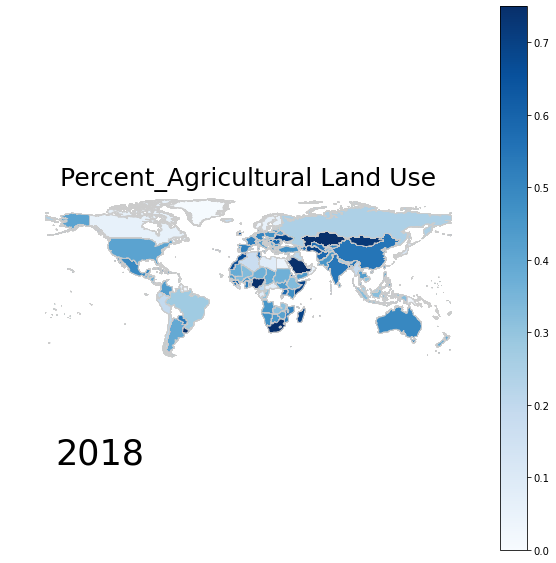

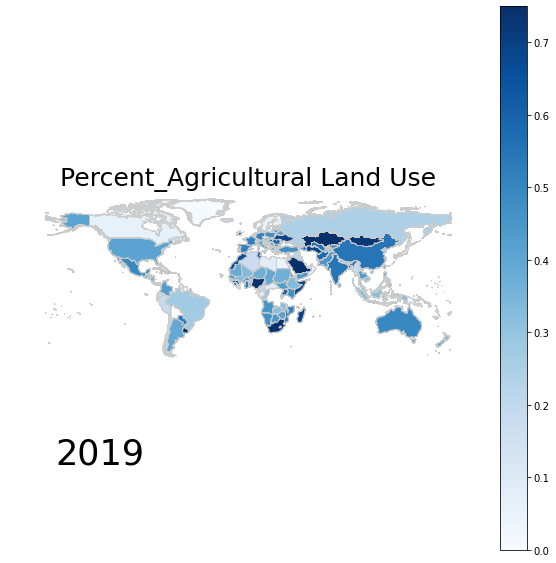

In [66]:
# Loop year year to create image for Nitrogen fertilizer use
for year in year_range:
    # create map showing data by country
    fig = merged.plot(column='Percent_Ag_Land', cmap='Blues', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # Remove axis
    fig.axis('off')
    
    # Create a title
    fig.set_title('Percent_Agricultural Land Use', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    # Position year in bottom left
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    # Save image as jpg for gif creation
    filepath = os.path.join(str(year) + '_land_use.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

In [68]:
# Convert jpg to png files for each map image
for year in year_range:
    im1 = Image.open(str(year) + '_land_use.jpg')
    im1.save(str(year) + '_land_use.png')
    os.remove(str(year) + '_land_use.jpg')

In [69]:
# Loop through png files and resize for better visualization
png_dir = os.getcwd()
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith(".png"):
        image = Image.open(file_name)
        new_width  = 800
        new_height = 800
        image = image.resize((new_width, new_height), Image.ANTIALIAS)
        image.save(file_name)

In [70]:
# Create Gif and remove each .png file
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith(".png"):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
        os.remove(file_path)
imageio.mimsave("MapGif_Land_Use.gif", images, fps=1)
